In [ ]:
from chemicals import CAS_from_any, Tb
import chemicals.critical as ct

In [ ]:
sub = CAS_from_any("HCN")

In [ ]:
Tb(sub, method="CRC_ORG")

In [ ]:
ct.Tb_Tc_relationship(Tc=ct.Tc(sub))

In [ ]:
import chemicals.data_reader as cd
cd.CONSTANT_DATABASE_NAME_TO_IDX

In [ ]:
chemicals.phase_change.Tb_all_methods

In [ ]:
from chemicals import miscdata
import chemicals.phase_change
CRC_ORG = 'CRC_ORG'
CRC_INORG = 'CRC_INORG'
YAWS = 'YAWS'
OPEN_NTBKM = 'OPEN_NTBKM'
CRC = 'CRC'

Tb_sources = {
        miscdata.HEOS: miscdata.heos_data,
        CRC_ORG: miscdata.CRC_organic_data,
        CRC_INORG: miscdata.CRC_inorganic_data
    }
cd.retrieve_from_df_dict(Tb_sources, sub, 'Tb', method=CRC_ORG)

In [ ]:
df=Tb_sources["WIKIDATA"]
#df.columns
df2=df[['Name', 'Tb']]
df3 = df2.dropna()
#["Tb"]]
df3

In [ ]:
df3["Name"]

In [ ]:
import numpy as np
import pandas as pd
import pubchempy as pcp

In [ ]:
from chemicals.data_reader import (
    data_source,
    database_constant_lookup,
    list_available_methods_from_df_dict,
    register_df_source,
    retrieve_any_from_df_dict,
    retrieve_from_df_dict,
)
Tb_data_Yaws = data_source('Yaws Boiling Points.tsv')

Tb_sources_new = {
        miscdata.HEOS: miscdata.heos_data,
        CRC_ORG: miscdata.CRC_organic_data,
        CRC_INORG: miscdata.CRC_inorganic_data,
        miscdata.COMMON_CHEMISTRY: miscdata.common_chemistry_data,
        miscdata.WEBBOOK: miscdata.webbook_data,
        YAWS: Tb_data_Yaws,
        miscdata.WIKIDATA: miscdata.wikidata_data,
        miscdata.JOBACK: miscdata.joback_predictions,
    }

In [ ]:
df_new=Tb_sources_new
cas_arr = []
df1 = []
for dict_df in df_new:
    print(dict_df, "  ", len(Tb_sources_new[dict_df]["Tb"].dropna()))
    df2 = Tb_sources_new[dict_df].index.to_numpy()
    df2 = list(set(df1) | set(df2))
    df1 = Tb_sources_new[dict_df].index.to_numpy()

In [ ]:
df_new=Tb_sources_new
cas_arr = []
list1 = list()
for dict_df in df_new:
    table = Tb_sources_new[dict_df]
    table["CAS"]=table.index
    #TABLE = table["Tb"].dropna()
    #print(table)
    #temp_DF = pd.concat([df1,table])
    list1.append(table)
CAS_search = Tb_sources_new["WIKIDATA"]["CAS"]

In [ ]:
table["CAS"]=table.index
table

In [ ]:
# create a excel writer object
text_sheet = "Source_"
i=1
with pd.ExcelWriter("TB_DB_CHEMICAL.xlsx") as writer:
    for list in list1 :
        temp_text_sheet = text_sheet+str(i)
        #print(list)
        #print("")
        #print("")
        
        # use to_excel function and specify the sheet_name and index 
        # to store the dataframe in specified sheet
        list.to_excel(writer, sheet_name=temp_text_sheet, index=False)
        i=i+1

In [ ]:
chemicals.phase_change.Tb_all_methods
len(df2)

In [ ]:
List1=list()
List2=list()
names = df3["Name"]
i=0
for name1 in names:
    print(i, "  ",name1)
    results = pcp.get_compounds(name1, 'name')
    if results == []:
        List1.append('None')
        List2.append('None')
    else:
        print(results[0].isomeric_smiles, " ", results[0].molecular_formula)
        List1.append(results[0].isomeric_smiles)
        List2.append(results[0].molecular_formula )
    i=i+1
    print("")
    
data = {
    "Name":names,
    "SMILES":List1,
    "Formula":List2
    }

tdf = pd.DataFrame(data)

tdf.to_csv("SMILES_3.csv")

In [1]:
import numpy as np
import pandas as pd
import pubchempy as pcp


def remove_outliers(Excel_path, Excel_sheetname, Threshold=3):
    df = pd.read_excel(Excel_path, sheet_name=Excel_sheetname)
    data = df['Tb']
    outliers = []
    threshold=Threshold
    mean = np.mean(data)
    std =np.std(data)
    
    for i in data:
        z_score = (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    new_df = df[~df['Tb'].isin(outliers)]
    print(outliers)
    return new_df
df = remove_outliers("Data.xlsx", "Load_AllDataSetC12")

[111.65, 184.55, 231.05, 169.45, 225.55, 188.45, 223.34999999999997, 1025.15, 753.8, 673.15, 674.15, 691.15]


In [2]:
df

,Name,SMILES,Tb,C
3,Cyclopropane,C1CC1,240.35,3
4,2-Methylpropane,CC(C)C,261.45,4
5,n-butane,CCCC,272.65,4
6,"1,3-Butadiene",C=CC=C,268.75,4
7,Spiro[2.2]pentane,C1CC12CC2,312.15,5
...,...,...,...,...
3364,"2-Propanamine, 2-Methyl-n-(1-Methylethyl)-",CC(C)NC(C)(C)C,371.15,7
3365,"Pyridazine, 4-Methyl-",CC1=CN=NC=C1,372.15,5
3366,Nitroethene,C=C[N+](=O)[O-],371.65,2
3367,"Hydrazine, 1,1-Diethyl-",CCN(CC)N,372.15,4


<Axes: xlabel='Tb'>

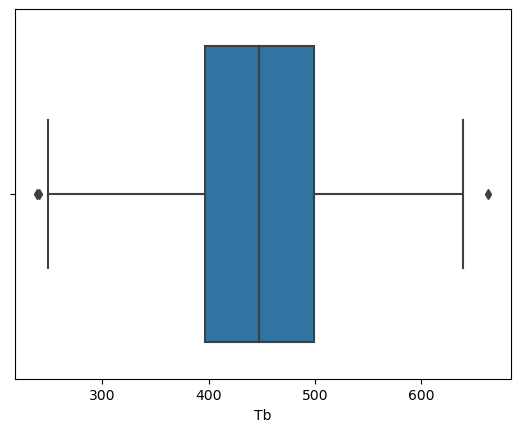

In [3]:
import seaborn as sns
sns.boxplot(x=df['Tb'])

<Axes: xlabel='Tb'>

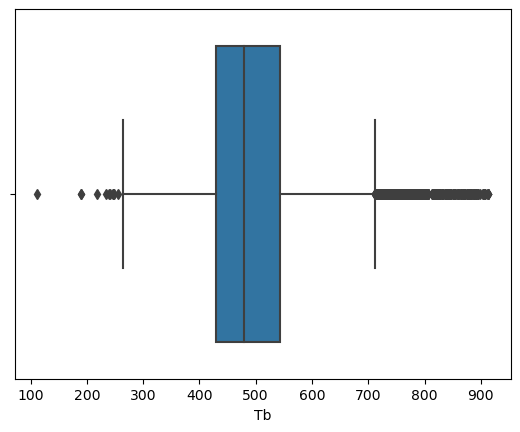

In [23]:
import seaborn as sns
sns.boxplot(x=df2['Tb'])

In [26]:
df2 = remove_outliers("Data.xlsx", "Load_CHON_8DB", 2)

[112.15, 190.15, 4098.15, 4273.15, 4473.15, 4473.15, 189.00035, 789.83, 799.73, 1149.94, 217.15, 1020.98, 787.24, 789.33, 795.83, 801.24, 801.63, 845.49, 869.81, 888.92, 892.02, 895.25, 934.61, 944.4, 963.92, 1088.82, 1245.87, 1271.54, 1359.98, 781.15, 788.27, 1263.42, 1369.98, 1382.86, 779.24, 779.24, 784.92, 785.85, 785.94, 792.34, 798.65, 804.03, 805.28, 805.87, 806.58, 814.11, 815.78, 825.6, 825.6, 825.6, 825.6, 830.51, 830.51, 842.44, 844.68, 844.68, 844.68, 844.68, 845.06, 847.39, 850.33, 850.33, 864.71, 868.55, 878.93, 883.7, 886.16, 888.2, 888.2, 888.2, 888.2, 898.01, 903.66, 905.58, 921.88, 941.53, 941.53, 947.86, 960.99, 987.95, 994.86, 994.86, 1003.02, 1013.62, 1102.06, 1288.16, 1299.68, 1464.99, 1887.63, 778.68, 778.72, 778.72, 778.72, 778.72, 778.72, 785.44, 785.44, 785.44, 794.96, 795.85, 825.55, 826.91, 827.96, 832.14, 839.25, 839.25, 839.28, 839.28, 841.17, 867.02, 869.07, 875.4, 875.4, 875.44, 879.77, 879.77, 913.18, 964.95, 1005.5, 1056.15, 1056.15, 1783.45, 783.78, 7

In [27]:
df2.shape

(10806, 6)

In [29]:
min(np.array(df2[["Tb"]]))

array([234.16])

In [6]:
pcp.get_compounds("50-00-0","name")

[Compound(712)]

In [ ]:
List1=list()
List2=list()
names = df3["Name"]
i=0
CAS_search
for name1 in CAS_search:
    print(i, "  ",name1)
    results = pcp.get_compounds(name1, 'name')
    if results == []:
        List1.append('None')
        List2.append('None')
    else:
        print(results[0].isomeric_smiles, " ", results[0].molecular_formula)
        List1.append(results[0].isomeric_smiles)
        List2.append(results[0].molecular_formula )
    i=i+1
    print("")
    
data = {
    "Name":names,
    "SMILES":List1,
    "Formula":List2
    }

tdf = pd.DataFrame(data)

tdf.to_csv("SMILES_3.csv")

In [ ]:
import numpy as np
import pandas as pd
import pubchempy as pcp

from chemicals.data_reader import (
    data_source,
    database_constant_lookup,
    list_available_methods_from_df_dict,
    register_df_source,
    retrieve_any_from_df_dict,
    retrieve_from_df_dict,
)
import chemicals.phase_change
Tb_data_Yaws = data_source('Yaws Boiling Points.tsv')

Tb_sources_new = {
        miscdata.HEOS: miscdata.heos_data,
        CRC_ORG: miscdata.CRC_organic_data,
        CRC_INORG: miscdata.CRC_inorganic_data,
        miscdata.COMMON_CHEMISTRY: miscdata.common_chemistry_data,
        miscdata.WEBBOOK: miscdata.webbook_data,
        YAWS: Tb_data_Yaws,
        miscdata.WIKIDATA: miscdata.wikidata_data,
        miscdata.JOBACK: miscdata.joback_predictions,
    }

CRC_ORG = 'CRC_ORG'
CRC_INORG = 'CRC_INORG'
YAWS = 'YAWS'
OPEN_NTBKM = 'OPEN_NTBKM'
CRC = 'CRC'


df_new=Tb_sources_new
cas_arr = []
df1 = []
for dict_df in df_new:
    
    print(Tb_sources_new[dict_df])
          #[["Tb"]])
        
        


In [ ]:
#Tb_sources_new["WEBBOOK"][["Tm","Tb"]].dropna()
Tb_sources_new["JOBACK"]

In [ ]:
for dict_df in df_new:
    print(dict_df)

In [ ]:
"""
HEOS                  K
CRC_ORG               K
CRC_INORG             K
COMMON_CHEMISTRY      K
WEBBOOK               K  (strange)
YAWS                  K
WIKIDATA              K
JOBACK                K


"""